<a href="https://colab.research.google.com/github/fnsalamaa/Machine-Learning/blob/main/Machine_Learning_Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**✩˚｡⋆ WEEK 12 MACHINE LEARNING ✩˚｡⋆**
#Optical Character Recognition (OCR)
## Name : Fina Salama Qowlam Hareny
### No  : 08 / 2141720164
### Class : TI-3I

----
###**⋰˚☆LAB WORK 1⋰˚☆**
###OCR with Pytesseract and OpenCV

**Description**
In this laboratory exercise, we will implement OCR techniques using Tesseract and OpenCV. Pytesseract or Python-tesseract is an OCR tool for Python that also serves as a wrapper for the Tesseract OCR engine. It can read and recognize text in images and is commonly used in cases of image-to-text OCR using Python.
Additionally, it is useful as a standalone script for Tesseract, as it can read all types of images supported by the Pillow and Leptonica image libraries, including jpeg, png, gif, bmp, tiff, and others.

**Dataset**
The dataset consists of image data used in this laboratory exercise. Please ensure your connection is stable before downloading the dataset.


**Step 1 - Installation**


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 10 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,802 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

**Step 1.1 - Import Library**

In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

**Step 1.2 - Import Files**


In [ ]:
from google.colab import files
from zipfile import ZipFile

uploaded = files.upload()

for fn in uploaded.keys():
    with ZipFile(fn, 'r') as zip:
        zip.extractall()
    print('Done')

Saving images-ocr.zip to images-ocr.zip
Done


In [ ]:
IMG_DIR = 'images/'

**Step 2 - Preprocessing Images with OpenCV**

In this stage, we will write basic functions for various preprocessing methods, including:
- grayscaling
- thresholding
- dilating
- eroding
- opening
- canny edge detection
- noise removal
- deskwing
- template matching

Different methods can be useful for different types of images.

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Show the original image of Galactic basic font

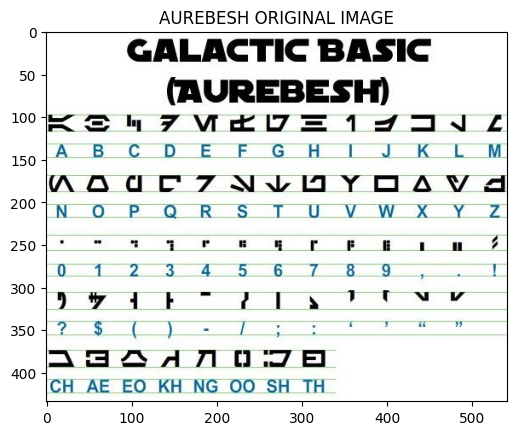

In [ ]:
# Plot original image

image = cv2.imread(IMG_DIR + 'aurebesh.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

In [ ]:
! gray.shape

/bin/bash: line 1: gray.shape: command not found


Next, perform pre-processing, and after applying the following code for preprocessing, a new image result will be obtained.

In [ ]:
# Preprocess image

gray = get_grayscale(image) # grayscaling from original image
thresh = thresholding(gray) # thresholding based on gray image
opening = opening(gray) # opening based on gray
canny = canny(gray) # canny based on gray
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

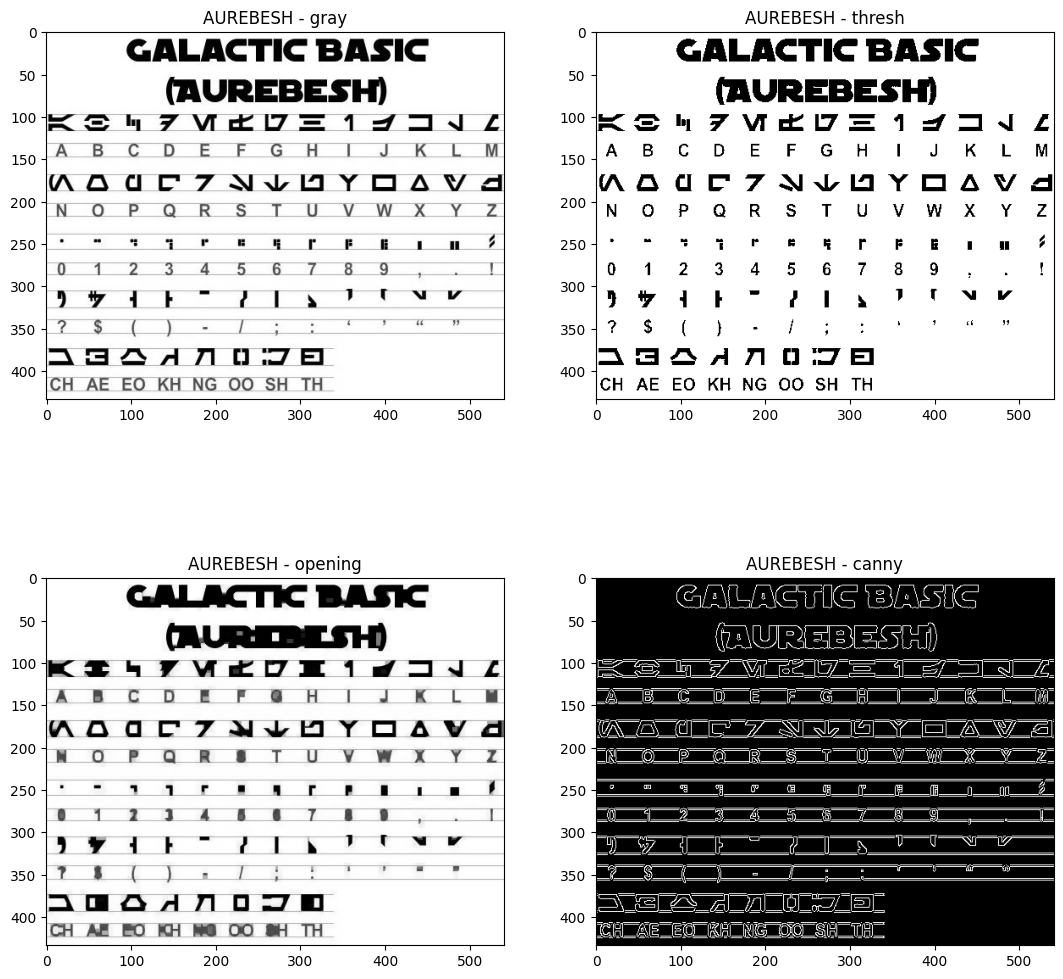

In [ ]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

Next, we will extract data from those images using OCR techniques through the following code.

In [ ]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> CANNY EDGE IMAGE
-------

From the OCR results with Tesseract, the output for each pre-processed image is obtained as follows.

----
###**⋰˚☆LAB WORK 2⋰˚☆**
###Getting Bounding Box around Text in an Image

**Description**
When running an image through the Tesseract OCR engine, pytesseract allows users to obtain bounding box information at:
- Character level,
- Word level,
- Based on regex patterns.

This practical guide will explain how to obtain both types of information.
**Dataset**
The dataset consists of image data used in this laboratory exercise. Please ensure your connection is stable before downloading the dataset.


**Bounding Box - Character Leve**

Using Pytesseract, you can obtain bounding box information for OCR results using the following code.

The script below will provide bounding box information for each character detected by Tesseract during the OCR process.

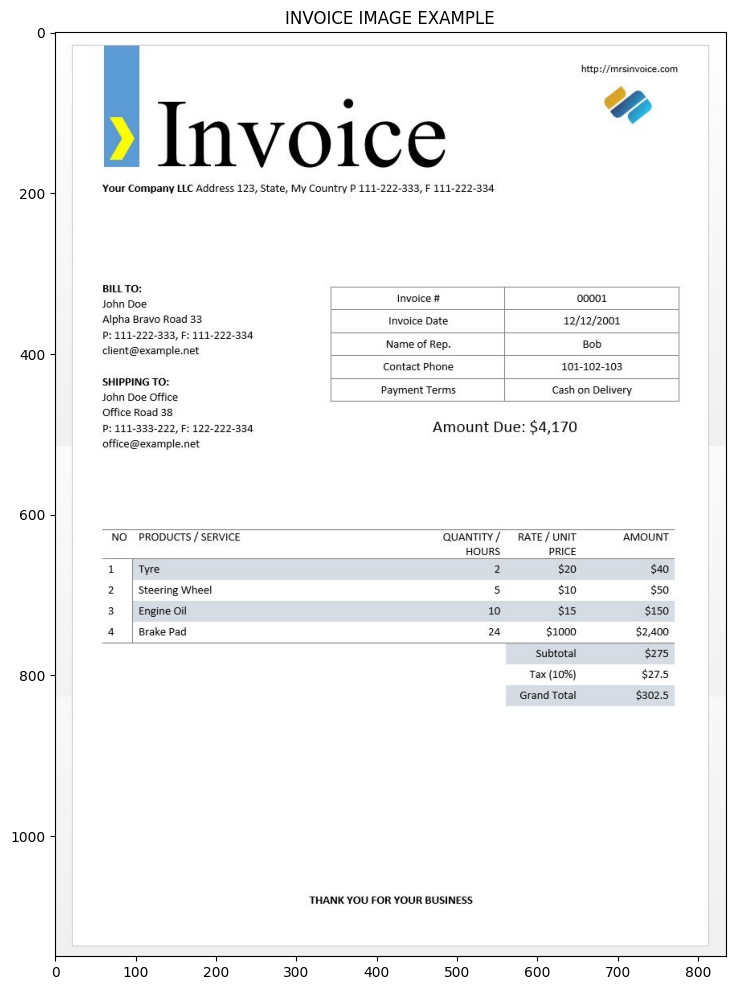

In [ ]:
# Original image plot

# Read images from a directory
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Separate color channels (blue, green, red) because matplotlib uses the RGB color scheme
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Displays images in a specified size
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('INVOICE IMAGE EXAMPLE')
plt.show()

The next step is to plot character boxes on the image using the pytesseract.image_to_boxes() function.

The following code will provide bounding box results on the invoice image.

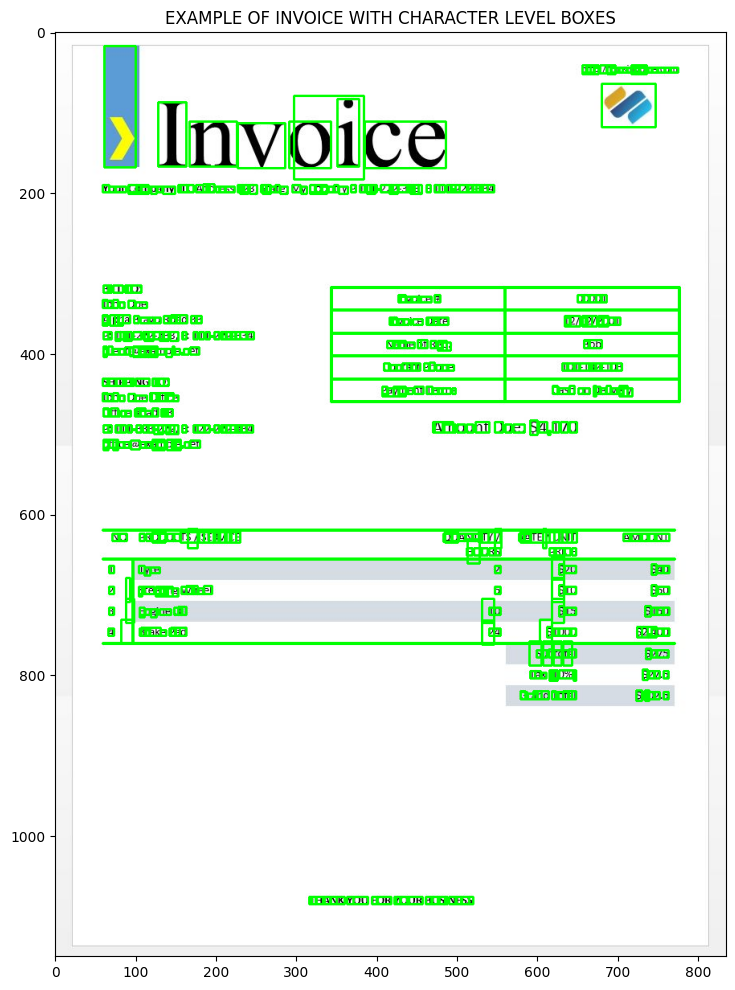

In [ ]:
# Read images from a directory
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Get the height (h), width (w), and color channel (c) dimensions of the image
h, w, c = image.shape

# Use pytesseract.image_to_boxes() to get character box information
boxes = pytesseract.image_to_boxes(image)

# Iterate through each row of results and create a box on the image using OpenCV
for b in boxes. splitlines():
     b = b.split(' ')
     image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0 , 255, 0), 2)

# Separate color channels to convert from BGR to RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Displays an image with a character box
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('EXAMPLE OF INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()

**Bounding Box - Word Level**

Next, we will use the example invoice image above to test the output results from Tesseract.

The following code will be used to read the example invoice image and then use the pytesseract.image_to_data() function to obtain text data from the image.

In [ ]:
# Read the sample invoice image
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Use pytesseract.image_to_data() to get text data from an image
d = pytesseract.image_to_data(image, output_type=Output.DICT)

# Displays data keys obtained from OCR results
print('DATA KEYS: \n', d.keys())

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Next, in the following code, we use it to filter and only display word boxes that have a confidence level of more than 60%. As a result, the example invoice image will be displayed with boxes marking the location of each word with the qualifying confidence level.

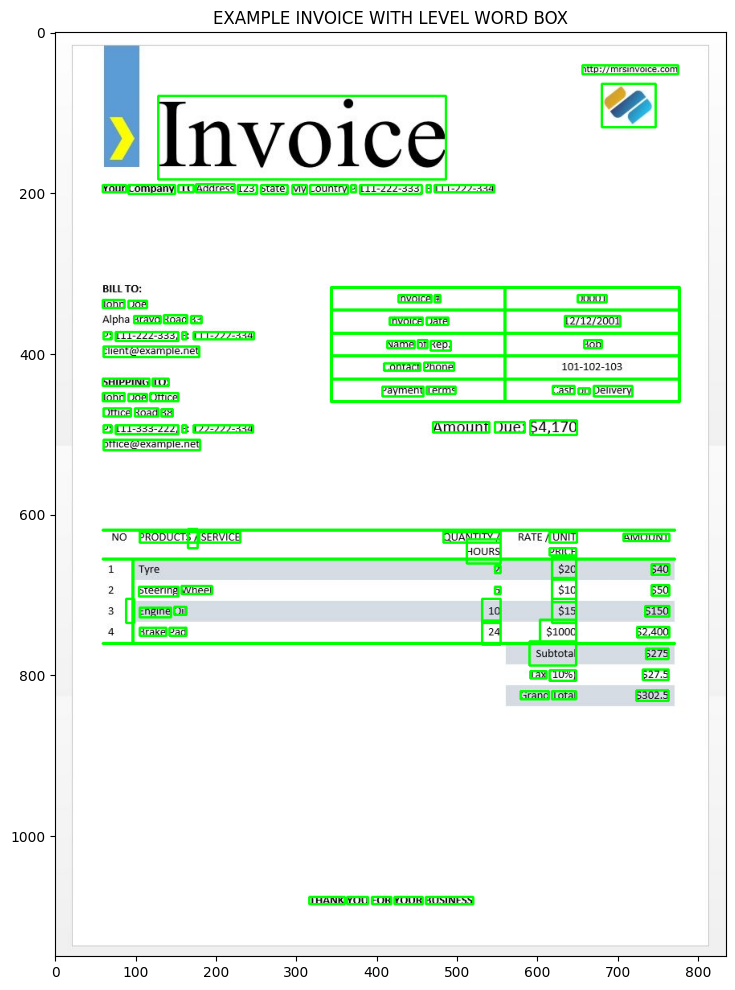

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
     # Condition to only select boxes with confidence > 60%
     if int(d['conf'][i]) > 60:
         # Gets the coordinates and size of the word box
         (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i] )
         # Create a box on the image for words with confidence > 60%
         image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Separate color channels to convert from BGR to RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Displays images with word boxes based on confidence > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('EXAMPLE INVOICE WITH LEVEL WORD BOX')
plt.show()

**Text Template Matching - Regex Pattern**

Suppose we want to find where a date is located in an image. Here, the template we will use is a regular expression pattern that we will match with our OCR results to find corresponding bounding boxes. We will use the regex module and the image_to_data function for this.

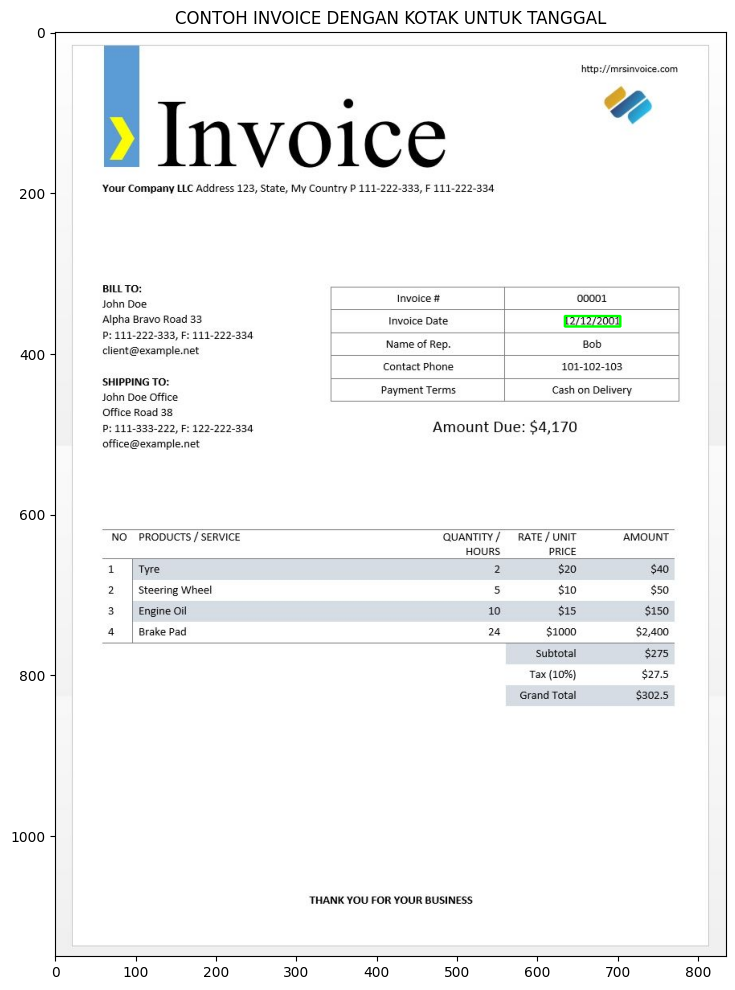

In [ ]:
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Pola tanggal dalam format dd/mm/yyyy
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
    if int(d['conf'][i]) > 60:
        # Memeriksa apakah teks di dalam kotak sesuai dengan pola tanggal
        if re.match(date_pattern, d['text'][i]):
            # Mendapatkan koordinat dan ukuran kotak kata
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            # Membuat kotak pada gambar untuk tanggal yang sesuai dengan pola
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak-kotak yang menandai lokasi tanggal
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK UNTUK TANGGAL')
plt.show()

**Language Detection - OCR**

To set the desired language for your OCR results, use the -l LANG argument in the configuration, whereLANG is the three-letter code for the language you want to use.

The following code is used to read and display an image containing text in multiple languages. The original image is displayed to provide an overview of its content before the OCR process.

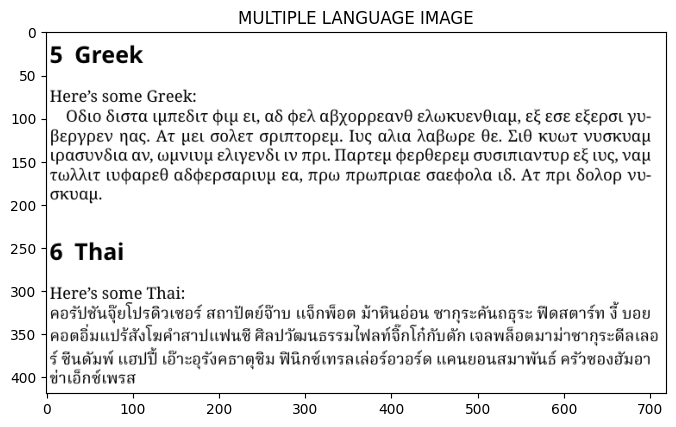

In [ ]:
# Membaca gambar asli
image = cv2.imread(IMG_DIR + 'greek-thai.png')

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

Next, the following code is used to extract text from the image using Tesseract OCR. A custom configuration (custom_config) is applied by specifying only the English language (-l eng). Other parameters such as --oem 3 and --psm 6 are also used to optimize OCR results as needed.

In [ ]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(image, config=custom_config))


5 Greek
Here’s some Greek:

OSto Stota tuMedit Huy et, aS ea aByoppeave edAwkvevOuay, e§ ece efepot yu-
Bepypev nas. AT Wel GoAET apiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil tv mpL TMaptep bepSepey GvaTLAaVTUp e€€ LUG, Va
TWAALT LUdaped ASdepoapluy Ea, TOW TpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aosUsugulushawos amiaddw usntioa sinfudou winszduagss Haaonsn 3 vos
Aonduusaladrawunud AavTausssulwavianlAdudn wandoamnsiwinsedataa
$ Guduvi woud rvaseasiadu Windinsadosor0sa uausouanrwus aswouduer
didadinsa



----
###**⋰˚☆Lab Assignment 2⋰˚☆**
###To detect text orientation and script type

This task aims to detect the orientation of text and the type of script used in an image using Tesseract.

**Task**
1. Image Preparation:
- Use the provided sample image ('hitchhikers-rotated.png').
- Display the original image using Python and OpenCV



In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [ ]:
# Path to the Tesseract executable (update this with your path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Path to the sample image
image_path = 'hitchhikers-rotated.png'

# Read the image using OpenCV
img = cv2.imread(image_path)

# Display the original image using OpenCV
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use Tesseract to detect orientation and script
orientation, script = pytesseract.image_to_osd(gray_img, output_type=Output.DICT)

# Print the detected orientation and script
print(f'Detected Orientation: {orientation["rotate"]}')
print(f'Detected Script: {script}')

# You can further process the image or extract text using pytesseract.image_to_string() if needed.

error: ignored

<Figure size 1000x800 with 0 Axes>

2. Orientation and Script Detection:
- Implement a Python script to detect the text orientation in the image.
- Use Tesseract to obtain the rotation angle and script type.
- Display the results of the orientation and script type

Image Preparation: Use the provided sample image ('hitchhikers-rotated.png'). Display the original image using Python and OpenCV. Orientation and Script Detection: Implement a Python script to detect the text orientation in the image. Use Tesseract to obtain the rotation angle and script type. Display the results of the orientation and script type